In [1]:
import os,sys,re

In [2]:
# Initialize Array to store the Mesh Sizes
mesh_convergence = []

for root, dirs,files in os.walk('.'):
    for filename in files:
        if (os.path.splitext(filename)[1]==".resu" and len(filename)>14):
            print(filename)
            
            myfile = open(filename,"r")

            content = myfile.read()
            dispRegex2 = re.compile(r'LA VALEUR MAXIMALE DE VMIS     EST  {1,}(-?\d.\d{14}E-?\+?\d\d) ')

            mo = os.path.splitext(filename)[0]
            mo2 = dispRegex2.findall(content)
            
            mesh_convergence.append([float(mo[9:]),float(mo2[0])])
            
            myfile.close()

platehole5.5.resu
platehole3.0.resu
platehole1.0.resu
platehole1.5.resu
platehole6.5.resu
platehole4.0.resu
platehole4.5.resu
platehole2.5.resu
platehole2.0.resu
platehole3.5.resu
platehole6.0.resu
platehole5.0.resu


In [3]:
mesh_convergence

[[5.5, 323.564770192393],
 [3.0, 354.236480197372],
 [1.0, 371.945078606738],
 [1.5, 369.260641596534],
 [6.5, 320.148515970293],
 [4.0, 346.636701440271],
 [4.5, 340.447820247344],
 [2.5, 361.194123162522],
 [2.0, 364.848662249931],
 [3.5, 351.351559027858],
 [6.0, 320.262879981185],
 [5.0, 280.327333445231]]

In [4]:
#Sort the array
mesh_convergence2 = sorted(mesh_convergence, key=lambda x: x[0])

In [5]:
mesh_convergence2

[[1.0, 371.945078606738],
 [1.5, 369.260641596534],
 [2.0, 364.848662249931],
 [2.5, 361.194123162522],
 [3.0, 354.236480197372],
 [3.5, 351.351559027858],
 [4.0, 346.636701440271],
 [4.5, 340.447820247344],
 [5.0, 280.327333445231],
 [5.5, 323.564770192393],
 [6.0, 320.262879981185],
 [6.5, 320.148515970293]]

In [6]:
#split into 2 lists for plotting
mesh_sizes = [x[0] for x in mesh_convergence2]
vmis_max = [x[1] for x in mesh_convergence2]

In [7]:
vmis_max

[371.945078606738,
 369.260641596534,
 364.848662249931,
 361.194123162522,
 354.236480197372,
 351.351559027858,
 346.636701440271,
 340.447820247344,
 280.327333445231,
 323.564770192393,
 320.262879981185,
 320.148515970293]

In [8]:
import matplotlib.pyplot as plt

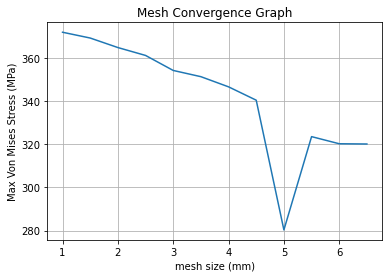

In [9]:
#Plotting using Matplotlib
fig, ax = plt.subplots()
ax.plot(mesh_sizes,vmis_max)
ax.set(xlabel="mesh size (mm)",ylabel="Max Von Mises Stress (MPa)",title="Mesh Convergence Graph")
ax.grid()

fig.savefig("mesh_convergence.png")
plt.show()

In [15]:
results_file = open("mesh_convergence.txt","w")
results_file.write("mesh_size,VMises(MPa)\n")
for res in mesh_convergence2:
    results_file.write(str(res[0])+","+str(res[1])+"\n")

results_file.close()